# Small Assignment 1 - Solutions
(due September 9th 2022, 11:59 PM PDT)

This assignment will help you get familiar with using **R** to manipulate data. We have included comments in the code cells to help outline the required steps. We will not provide such comments in the future, but we encourage you to develop a habit of annotating your code in a similar way, so that another reader (perhaps yourself in the future!) can easily follow what you are doing.

If you have questions about using particular functions in **R**, remember that entering `?function` or `help(function)` will pull up a window outlining the syntax for the function and how the arguments should be entered.

Please submit this assignment via Gradescope. To do so you will need to generate a single pdf
file of your answers. For small assignments, the pdf can be composed of photo images and/or
screenshots if you are not using Jupyter. Please see the [submission instructions](https://gradescope-static-assets.s3-us-west-2.amazonaws.com/help/submitting_hw_guide.pdf) for help uploading to Gradescope. 

## Part 1. 
We are going to explore the nuts and bolts of regressions by doing one by hand. *Please do not use canned functions to calculate sample variances and covariances and to estimate regression coefficients.*

Start by reading in the `energy.csv` file.

In [6]:
# Read in the data and save it as an object
data <- read.csv('energy.csv', header = TRUE)

View the structure of the dataset using the `head` function.

In [7]:
# View first few lines of data
head(data)

,country_name,country_code,energy_use,pop,gdp
,<chr>,<chr>,<dbl>,<int>,<dbl>
1,Albania,ALB,8480.065,2837743,1.515643e+10
2,Algeria,DZA,12958.346,43851043,1.749110e+11
3,Angola,AGO,6058.792,32866268,7.779294e+10
4,Argentina,ARG,22430.227,45376763,5.248200e+11
5,Australia,AUS,67373.945,25687041,1.428530e+12
6,Austria,AUT,47115.410,8917205,4.551680e+11


**(a)** Create two new variables, GDP (\$) per capita and energy use (KT oil equivalent) per capita.

*Hint: Use the* `mutate` *function (you will have to load* `tidyverse` *first).* 


In [8]:
# Load tidyverse
library(tidyverse)
# Generate per capita variables
data <- data %>% mutate(gdppc = gdp/pop,energypc = energy_use/pop)
head(data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,country_name,country_code,energy_use,pop,gdp,gdppc,energypc
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Albania,ALB,8480.065,2837743,1.515643e+10,5341.017,0.0029883134
2,Algeria,DZA,12958.346,43851043,1.749110e+11,3988.753,0.0002955083
3,Angola,AGO,6058.792,32866268,7.779294e+10,2366.954,0.0001843468
4,Argentina,ARG,22430.227,45376763,5.248200e+11,11565.832,0.0004943109
5,Australia,AUS,67373.945,25687041,1.428530e+12,55612.867,0.0026228768
6,Austria,AUT,47115.410,8917205,4.551680e+11,51043.797,0.0052836522


**(b)** Generate a scatter plot comparing energy use per capita (on the y-axis) to GDP per capita (on the x-axis) for the countries in your sample. *Hint: Use the* `plot` *function.*

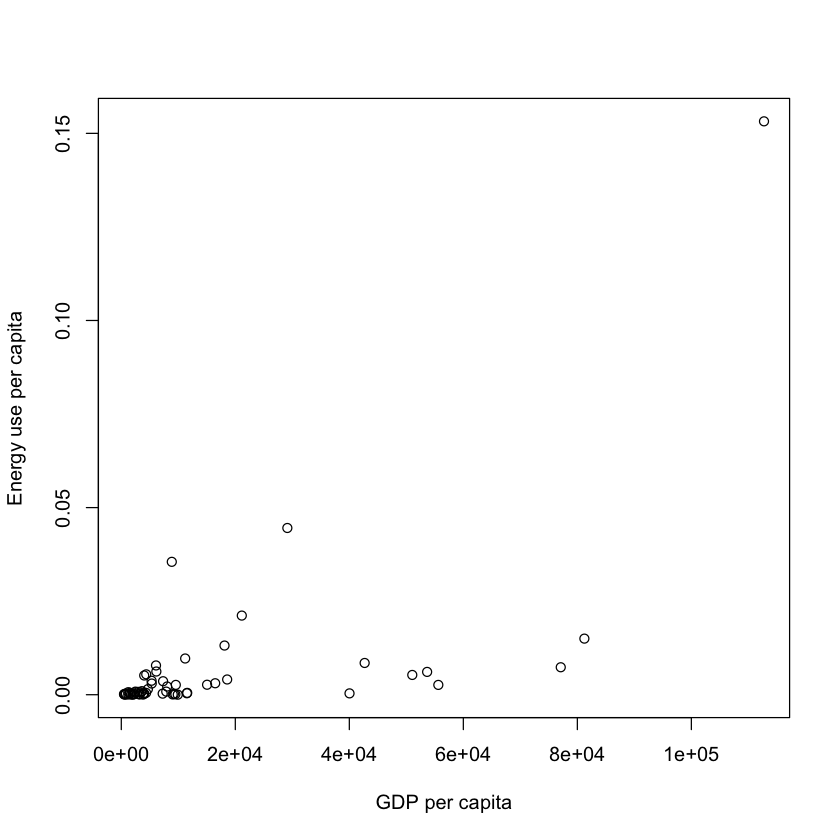

In [9]:
# Simple scatterplot
plot(data$gdppc,data$energypc, xlab = "GDP per capita", ylab = "Energy use per capita")
# add titles to make it pretty

**(c)** Calculate the sample mean of GDP per capita, sample mean of energy per capita,
covariance of GDP per capita and energy use per capita, and variance of GDP per
capita.

*Hint: The functions `sum()` and `nrow()` will be useful. Create a vector by writing `c(object1, object2, object3,...)`.

In [10]:
# Save means as new objects
xbar <- mean(data$gdppc)
ybar <- mean(data$energypc)

# Create new columns with residuals (x_i-\bar{x}) and (y_i-\bar{y}) as part of your data 
data <- mutate(data,
               xres = gdppc - xbar, yres = energypc - ybar)
# Create new columns with the elements you need to calculate the covariance and variance, based on the residuals
data <- mutate(data,xy=xres*yres,xx=xres^2)

# Save the covariance and variance as new objects by summing over the relevant variables and dividing by n-1. 
covxy <- sum(data$xy)/(nrow(data)-1)
varx <- sum(data$xx)/(nrow(data)-1)

# Display results, using a vector with four elements
c(xbar,ybar,covxy,varx)

[1] 1.416512e+04 6.405317e-03 2.981685e+02 4.948874e+08

**(d)** Suppose $y_i$ is energy use per capita in country $i$ and $x_i$ is GDP per capita in country $i$. Suppose your statistical model is $$y_i=\beta_0+\beta_1x_i+u_i.$$ Estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ using your results in part **(c)**. 

In [11]:
# Solve for \hat\beta_1 and \hat\beta_0 and save these objects
b1hat <- covxy/varx
b0hat <- ybar-xbar*b1hat

# Display results as a vector
c(b0hat, b1hat)

[1] -2.129134e-03  6.024976e-07

**(e)** Plot a line which indicates the predictions from your estimated model, $$\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i.$$ *Hint: use the* `curve` and `points` *functions.*

In [12]:
range(data$gdppc)

[1]    474.9702 112743.6944

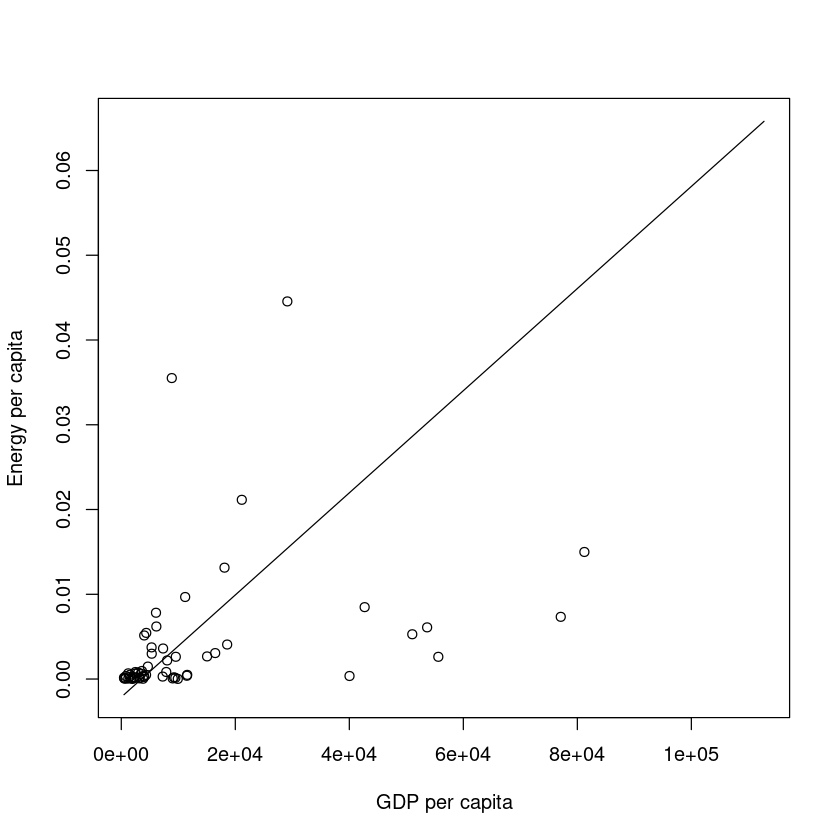

In [28]:
# Plot the line
curve(b0hat+b1hat*x,min(data$gdppc),max(data$gdppc),
      xlab='GDP per capita',ylab='Energy per capita')

# Overlay with data points
points(data$gdppc,data$energypc)

**(f)** Interpret your estimates $\hat{\beta}_0$ and $\hat{\beta}_1$.

$\beta_0$ = -0.002129 means that the model predicts that a country with 0 GDP would have energy use equivalent to -0.002129 KT of oil. $\beta_1$ = 6.02e-07 means that model predicts that each additional dollar of GDP leads to 6.02e-07 additional KT of oil equivalent energy use.

## Part 2.
Suppose you estimate a weekly wage equation which suggests 

$$ \log(wage_i)= 4.54 + .056*Ed_i+u_i$$

where $Ed_i$ is the number of years of education completed by person $i$. 

**(a)** Predict the wage for a person with 12 years of education (that is a person who completes high school).

In [29]:
exp(4.54+0.056*12)

[1] 183.4606

**(b)** Interpret your estimated $\beta_1$=0.056.

An additional year of education is associated with 5.6% higher weekly wages.